# read the data

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# data cleaning

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.corr()

<ipython-input-3-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [ ]:
x = data.iloc[:, 3:13]

In [ ]:
x.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9323,644,France,Male,50,9,76817.00,4,1,0,196371.13
641,706,France,Female,29,5,112564.62,1,1,0,42334.38
5556,606,France,Male,40,6,119501.88,2,1,0,46774.94


In [ ]:
y = data.iloc[:, 13:14]

In [ ]:
y.sample(3)

,Exited
5632,1
9187,0
2940,0


In [ ]:
y.value_counts()

Exited
0         7963
1         2037
dtype: int64

In [ ]:
x = pd.get_dummies(x, drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


# modeling

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential([
    Dense(units = 3, activation = 'relu'),
    Dense(units = 3, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 3, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer = 'Adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [ ]:
model.fit(x = x_train, y= y_train, batch_size=20, epochs = 30)

Epoch 1/30
400/400 [==============================] - 2s 2ms/step - loss: 0.5550 - accuracy: 0.7960
Epoch 2/30
400/400 [==============================] - 1s 2ms/step - loss: 0.5009 - accuracy: 0.7960
Epoch 3/30
400/400 [==============================] - 1s 2ms/step - loss: 0.4903 - accuracy: 0.7960
Epoch 4/30
400/400 [==============================] - 1s 2ms/step - loss: 0.4817 - accuracy: 0.7960
Epoch 5/30
400/400 [==============================] - 1s 2ms/step - loss: 0.4673 - accuracy: 0.7960
Epoch 6/30
400/400 [==============================] - 1s 2ms/step - loss: 0.4590 - accuracy: 0.7960
Epoch 7/30
400/400 [==============================] - 1s 3ms/step - loss: 0.4531 - accuracy: 0.7960
Epoch 8/30
400/400 [==============================] - 1s 3ms/step - loss: 0.4489 - accuracy: 0.7960
Epoch 9/30
400/400 [==============================] - 1s 3ms/step - loss: 0.4482 - accuracy: 0.7960
Epoch 10/30
400/400 [==============================] - 1s 2ms/step - loss: 0.4433 - accuracy: 0.7960

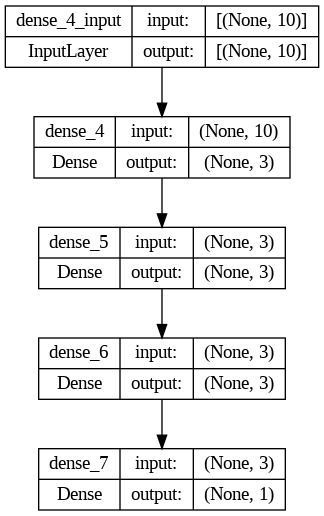

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)